## Question 1 (`Needs Higher Attention`):
You are given the following dataset:

In [ ]:
import pandas as pd

# Dataset
data = {
    "Input_Feature_1": [2, 1, 3, 4, 5],
    "Input_Feature_2": [1, 3, 2, 5, 4],
    "Input_Feature_3": [3, 2, 1, 6, 6],
    "Target": ['No', 'Yes', 'No', 'Yes', 'Yes']
}

# Create a DataFrame
df = pd.DataFrame(data)

df

,Input_Feature_1,Input_Feature_2,Input_Feature_3,Target
0,2,1,3,No
1,1,3,2,Yes
2,3,2,1,No
3,4,5,6,Yes
4,5,4,6,Yes


``Write a Python code to:``

- Train a Logistic Regression classifier on this dataset.
- Generate the accuracy score of the model.
- Plot the confusion matrix as a heatmap.

### Explanation for the confusion matrix:

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

The matrix displays the number of instances produced by the model on the test data.

- True Positive (TP): The model correctly predicted a positive outcome (the actual outcome was positive).
- True Negative (TN): The model correctly predicted a negative outcome (the actual outcome was negative).
- False Positive (FP): The model incorrectly predicted a positive outcome (the actual outcome was negative). Also known as a Type I error.
- False Negative (FN): The model incorrectly predicted a negative outcome (the actual outcome was positive). Also known as a Type II error.


<img src="https://i.imgur.com/UM28BCN.png" width="480">

## Solution for question 1:

Accuracy: 0.50
Confusion Matrix:
[[0 0]
 [1 1]]


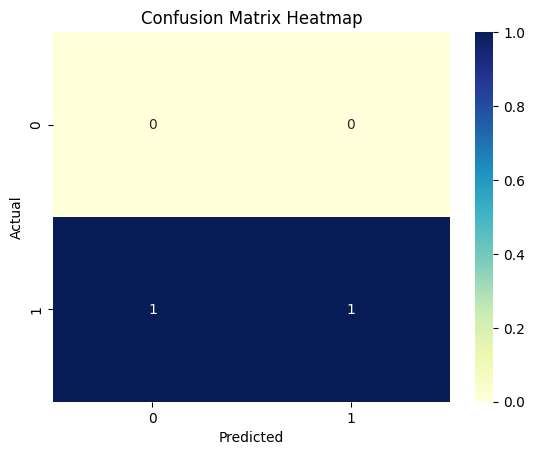

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# mapping the target column to numerics:
df['Target'] = df['Target'].map({'No': 0, 'Yes': 1})

# Features and target
X = df[["Input_Feature_1", "Input_Feature_2", "Input_Feature_3"]]
y = df["Target"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


## Question 2:

You are given the following dataset:

In [ ]:
import pandas as pd

# Create the dataset

data = {
    "Age": [25, 30, 45, 35, None, 28, 50, 40, 33, 27, 42, None, 31, 37, 29],
    "Salary": [50000, None, 120000, 75000, 80000, 60000, 150000, 95000, 85000, None, 110000, 105000, 70000, 92000, None],
    "Gender": ["Male", "Female", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male"],
    "Department": ["Sales", "IT", "HR", "IT", "Sales", "HR", "IT", "Sales", "HR", "Sales", "IT", "HR", "Sales", "IT", "HR"],
    "Experience": [2, 5, 20, 10, 12, 4, 25, 15, 9, 3, 18, 17, 8, 11, 6],
    "Target": [20000, 40000, 90000, 60000, 70000, 35000, 120000, 80000, 70000, 30000, 100000, 95000, 55000, 78000, 45000]
}

df = pd.DataFrame(data)

df

,Age,Salary,Gender,Department,Experience,Target
0,25.0,50000.0,Male,Sales,2,20000
1,30.0,NaN,Female,IT,5,40000
2,45.0,120000.0,Female,HR,20,90000
3,35.0,75000.0,Male,IT,10,60000
4,NaN,80000.0,Female,Sales,12,70000
5,28.0,60000.0,Male,HR,4,35000
6,50.0,150000.0,Female,IT,25,120000
7,40.0,95000.0,Male,Sales,15,80000
8,33.0,85000.0,Female,HR,9,70000
9,27.0,NaN,Male,Sales,3,30000


`Write a Python code to Perform the following:`

1. Handle the NaN values in the dataset.
2. Encode the categorical columns Gender and Department.
3. Apply Min-Max scaling to the numerical columns.
4. Train a multiple linear regression model to predict the Target column.
5. Evaluate the model using the Root Mean Squared Error (`RMSE`).

## Solution for question 2:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Step 1: Handle NaN values
df["Age"].fillna(df["Age"].mean(), inplace=True)  # Replace NaN in 'Age' with mean
df["Salary"].fillna(df["Salary"].median(), inplace=True)  # Replace NaN in 'Salary' with median

# Step 2: Encode categorical columns
label_encoder_gender = LabelEncoder()
label_encoder_department = LabelEncoder()

df["Gender"] = label_encoder_gender.fit_transform(df["Gender"])  # Male=1, Female=0
df["Department"] = label_encoder_department.fit_transform(df["Department"])  # Sales=2, IT=1, HR=0

# Step 3: Apply Min-Max scaling
scaler = MinMaxScaler()
df[["Age", "Salary", "Experience"]] = scaler.fit_transform(df[["Age", "Salary", "Experience"]])

# Step 4: Split the data
X = df[["Age", "Salary", "Gender", "Department", "Experience"]]
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 8829.70


<ipython-input-9-3a6e35954227>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)  # Replace NaN in 'Age' with mean
<ipython-input-9-3a6e35954227>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

## Question 3 (`Needs Higher Attention`):

Write a Python code to calculate the cosine similarity between the following two sentences:

- Sentence 1: "I love programming in Python."
- Sentence 2: "Python programming is fun."

## Solution for question 3:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sentences
sentences = ["I love programming in Python.", "Python programming is fun."]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# Cosine similarity
similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
print(similarity)


[[0.33609693]]


## Question 4 (`Needs Higher Attention`):

Write Python code to classify the following sentences as positive or negative using the Logistic Regression algorithm:

1. `The app is user-friendly.`
2. `The interface is confusing.`

Training data:

In [ ]:
# Training data:
texts = ["Good experience!", "Terrible design.", "Loved the functionality.", "Horrible app."]
labels = [1, 0, 1, 0]  # 1 = positive, 0 = negative


## Solution for question 4:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


# Vectorization
# CountVectorizer converts text into numerical format (Bag-of-Words approach):
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts)

# Model training
model = LogisticRegression()
model.fit(X_train, labels)

# Predictions
new_texts = ["The app is user-friendly.", "The interface is confusing."]
X_test = vectorizer.transform(new_texts)
predictions = model.predict(X_test)

print(predictions)


[0 1]


## Question 5 (`Needs Higher Attention`):

Write Python code to:

- Convert the text: `I like Machine Learning; it is a little bit challenging! But, it is still a lot of fun!` to lowercase.
- Tokenize the text into words.
- Count the frequency of each word (`IGNORE PUNCTUATIONS WHEN COUNTING WORDS`).

## Solution for question 5:

In [ ]:
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt_tab')

# Step 1: Custom function to count word frequencies (ignoring punctuation)
def count_word_frequencies(tokens):
    word_freq = {}
    for token in tokens:
        if token not in string.punctuation:  # Ignore punctuation
            if token in word_freq:
                word_freq[token] += 1
            else:
                word_freq[token] = 1
    return word_freq

# Step 2: Preprocessing and tokenization
text = "I like Machine Learning; it is a little bit challenging! But, it is still a lot of fun!"
text_lower = text.lower()
tokens = word_tokenize(text_lower)

# Step 3: Apply the custom function
word_frequencies = count_word_frequencies(tokens)
print(word_frequencies)


{'i': 1, 'like': 1, 'machine': 1, 'learning': 1, 'it': 2, 'is': 2, 'a': 2, 'little': 1, 'bit': 1, 'challenging': 1, 'but': 1, 'still': 1, 'lot': 1, 'of': 1, 'fun': 1}


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
